In [36]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# Exercici 1

## Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica.

Per a aquesta tasca farem servir [aquest dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) de 120 d'història dels Jocs Olímpics. 

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [13]:
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Abans d'eliminar els valors ``NaN``, omplirem i discretitzarem els valors de la columna ``Medal``, ja que en aquest cas el ``NaN`` sí que és significatiu.

In [4]:
df['Medal'].fillna(0, inplace=True)

In [5]:
df['Medal'].replace({'Gold': 1, 'Silver': 2, 'Bronze': 3}, inplace=True)

Ara ja podem desfer-nos dels ``NaN``

In [12]:
df.dropna(inplace=True)

Agafarem l'atribut de l'edat de les esportistes per a calcular les quantitats demanades. La majoria de les quantitats les podem trobar amb un simple ``describe()``

In [16]:
pd.set_option('float_format', '{0:.2f}'.format)
df['Age'].describe()

count   206165.00
mean        25.06
std          5.48
min         11.00
25%         21.00
50%         24.00
75%         28.00
max         71.00
Name: Age, dtype: float64

In [17]:
df['Age'].mode()

0   23.00
dtype: float64

Amb això ja hem obtingut les quantitats demanades. Tot i així hem vist en les dades obtingudes que la edat màxima en el dataset son 71 anys. Serà un error? La meva curiositat m'impedeix no mirar-ho.

In [23]:
df.loc[df['Age'] >= 70.00]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
97374,49287,Hiroshi Hoketsu,M,71.00,168.00,62.00,Japan,JPN,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Dressage, Individual",0
121779,61572,Durward Randolph Knowles,M,70.00,176.00,78.00,Bahamas,BAH,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed Two Person Keelboat,0
188096,94490,Owen D. Phillips,M,70.00,175.00,76.00,Belize,BIZ,1976 Summer,1976,Summer,Montreal,Shooting,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",0


In [25]:
df.loc[df['Age'] > 67.00]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
97374,49287,Hiroshi Hoketsu,M,71.00,168.00,62.00,Japan,JPN,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Dressage, Individual",0
109841,55539,Hilda Lorna Johnstone (Wailes-Fairbairn-),F,69.00,162.00,66.00,Great Britain,GBR,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Dressage, Individual",0
109842,55539,Hilda Lorna Johnstone (Wailes-Fairbairn-),F,69.00,162.00,66.00,Great Britain,GBR,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Dressage, Team",0
121779,61572,Durward Randolph Knowles,M,70.00,176.00,78.00,Bahamas,BAH,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed Two Person Keelboat,0
188096,94490,Owen D. Phillips,M,70.00,175.00,76.00,Belize,BIZ,1976 Summer,1976,Summer,Montreal,Shooting,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",0
225775,113447,Roberto Soundy,M,68.00,178.00,80.00,El Salvador,ESA,1968 Summer,1968,Summer,Mexico City,Shooting,Shooting Mixed Trap,0


Sembla ser que no és un error, i que hi han atletes competint amb més de 67 anys! Admirable.

# Exercici 2

## Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

Mirarem si hi ha alguna relació entre l'alçada i el pes, esperant una forta correlació positiva.

In [29]:
df['Height'].corr(df['Weight'])

0.7965725794977142

# Exercici 3

## Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

<AxesSubplot:>

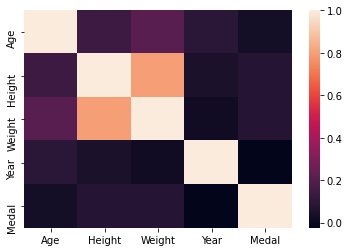

In [35]:
sns.heatmap(df[['Age', 'Height', 'Weight', 'Year', 'Medal']].corr())

Com era d'esperar, els únics atributs amb una forta correlació positiva són el pes amb l'alçada.

# Exercici 4

## Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

Un cop més, agafarem l'edat per calcular aquestes mitjanes.

In [39]:
np.mean(df['Age'])

25.055508937016466

In [37]:
stats.gmean(df['Age'])

24.502131365732552

In [38]:
stats.hmean(df['Age'])

23.978816810755987